In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, models, regularizers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io
import cv2
import os
from sklearn.model_selection import train_test_split
import datetime as date
from sklearn.model_selection import train_test_split
from dateutil.relativedelta import relativedelta

# Mat bestand

In [3]:
cols = ['age', 'gender', 'path', 'face_score1', 'face_score2']

imdb_mat = 'imdb_crop/imdb.mat'

imdb_data = scipy.io.loadmat(imdb_mat)

del imdb_mat

imdb = imdb_data['imdb']

imdb_photo_taken = imdb[0][0][1][0]
imdb_full_path = imdb[0][0][2][0]
imdb_gender = imdb[0][0][3][0]
imdb_face_score1 = imdb[0][0][6][0]
imdb_face_score2 = imdb[0][0][7][0]

imdb_path = []

for path in imdb_full_path:
    imdb_path.append('imdb_crop/' + path[0])


imdb_genders = []

for n in range(len(imdb_gender)):
    if imdb_gender[n] == 1:
        imdb_genders.append('male')
    else:
        imdb_genders.append('female')

imdb_dob = []

for file in imdb_path:
    temp = file.split('_')[3]
    temp = temp.split('-')
    if len(temp[1]) == 1:
        temp[1] = '0' + temp[1]
    if len(temp[2]) == 1:
        temp[2] = '0' + temp[2]

    if temp[1] == '00':
        temp[1] = '01'
    if temp[2] == '00':
        temp[2] = '01'

    imdb_dob.append('-'.join(temp))


imdb_age = []

for i in range(len(imdb_dob)):
    try:
        d1 = date.datetime.strptime(imdb_dob[i][0:10], '%Y-%m-%d')
        d2 = date.datetime.strptime(str(imdb_photo_taken[i]), '%Y')
        rdelta = relativedelta(d2, d1)
        diff = rdelta.years
    except Exception as ex:
        print(ex)
        diff = -1
    imdb_age.append(diff)

final_imdb = np.vstack((imdb_age, imdb_genders, imdb_path, imdb_face_score1, imdb_face_score2)).T

final_imdb_df = pd.DataFrame(final_imdb)

final_imdb_df.columns = cols

meta = final_imdb_df

meta = meta[meta['face_score1'] != '-inf']
meta = meta[meta['face_score2'] == 'nan']

meta = meta.drop(['face_score1', 'face_score2'], axis=1)

meta = meta.sample(frac=1)

meta.to_csv('meta.csv', index=False)

time data '0-12-22' does not match format '%Y-%m-%d'
time data '0-05-21' does not match format '%Y-%m-%d'
time data '0-11-18' does not match format '%Y-%m-%d'
time data '0-11-18' does not match format '%Y-%m-%d'
time data '0-11-18' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-%m-%d'
time data '0-07-31' does not match format '%Y-

# Leeftijd

In [4]:
# Loading dataset
meta = pd.read_csv('meta.csv')

old = meta[meta["age"].between(43, 101)].iloc[:25000]
not_old = meta[meta["age"].between(21, 42)].iloc[:25000]
meta = pd.concat([old, not_old])

# Dropping gender column
meta = meta.drop(['gender'], axis=1)

meta['old_or_not'] = (meta['age'] > 42).astype(int)

meta.head()

,age,path,old_or_not
0,50,imdb_crop/38/nm0112138_rm3229002496_1925-11-30...,1
1,47,imdb_crop/31/nm0000131_rm3740660480_1966-6-28_...,1
2,46,imdb_crop/93/nm2052793_rm2461644032_1958-3-9_2...,1
7,45,imdb_crop/81/nm0470981_rm1740419072_1962-9-8_2...,1
23,65,imdb_crop/64/nm0000164_rm537238016_1937-12-31_...,1


In [ ]:
# Spliting dataset into training and testing set
D_train, D_test = train_test_split(meta, test_size=0.2, random_state=42, stratify=meta["old_or_not"])

# Converting into numpy array
D_train, D_test = D_train.values, D_test.values

# Making the directory structure
for i in range(102):
    output_dir_train_male = 'dataset/age/train/' + str(i)
    output_dir_train_female = 'dataset/age/train/' + str(i)

    if not os.path.exists(output_dir_train_male):
        os.makedirs(output_dir_train_male)

    if not os.path.exists(output_dir_train_female):
        os.makedirs(output_dir_train_female)

    output_dir_test_male = 'dataset/age/test/' + str(i)
    output_dir_test_female = 'dataset/age/test/' + str(i)

    if not os.path.exists(output_dir_test_male):
        os.makedirs(output_dir_test_male)

    if not os.path.exists(output_dir_test_female):
        os.makedirs(output_dir_test_female)

# Finally making the training and testing set
counter = 0

for image in D_train:
    img = cv2.imread(image[1], 1)
    img = cv2.resize(img, (64,64))
    cv2.imwrite('dataset/age/train/' + str(image[0]) + '/' + str(counter) + "_" + str(image[2]) + '.jpg', img)
    print('--('+str(counter)+')Processing--')
    counter += 1

counter = 0

for image in D_test:
    img = cv2.imread(image[1], 1)
    img = cv2.resize(img, (64,64))
    cv2.imwrite('dataset/age/test/' + str(image[0]) +  '/' + str(counter) + "_" + str(image[2]) + '.jpg', img)
    print('--('+str(counter)+')Processing--')
    counter += 1

<Axes: xlabel='label', ylabel='count'>

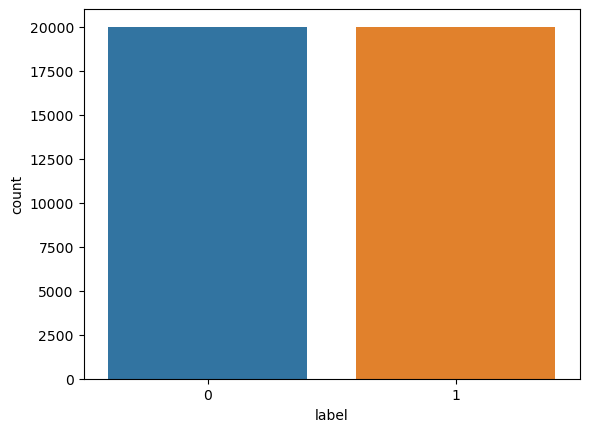

In [4]:
import warnings
warnings.filterwarnings('ignore')

count_df = pd.DataFrame(columns=["label"])
for item in D_train:
    count_df = count_df.append({"label": item[2]}, ignore_index=True)
sns.countplot(data=count_df, x="label")

# Modelleren

In [2]:
# Define image size
IMG_SIZE = (64, 64)

# Function to load images and labels from a directory
def load_images_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        if filename.endswith('.jpg'):
            # Extract the label from the filename
            label = int(filename.split('_')[1].split('.')[0])
            # Read and resize image
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, IMG_SIZE)
                images.append(img)
                labels.append(label)
            else:
                print(f"Warning: Unable to read image {img_path}")
    return np.array(images), np.array(labels)

# Paths to training and testing directories
train_dir = 'dataset/age/train'
test_dir = 'dataset/age/test'

# Initialize lists
train_images = []
train_labels = []
test_images = []
test_labels = []

# Load training images and labels
for age_group in range(102):
    age_group_dir = os.path.join(train_dir, str(age_group))
    images, labels = load_images_from_folder(age_group_dir)
    if len(images) > 0:
        train_images.append(images)
        train_labels.append(labels)

# Concatenate lists into single arrays
if len(train_images) > 0:
    train_images = np.concatenate(train_images, axis=0)
    train_labels = np.concatenate(train_labels, axis=0)

# Load testing images and labels
for age_group in range(102):
    age_group_dir = os.path.join(test_dir, str(age_group))
    images, labels = load_images_from_folder(age_group_dir)
    if len(images) > 0:
        test_images.append(images)
        test_labels.append(labels)

# Concatenate lists into single arrays
if len(test_images) > 0:
    test_images = np.concatenate(test_images, axis=0)
    test_labels = np.concatenate(test_labels, axis=0)

# Verify the shape of your arrays
print(f'Train images shape: {train_images.shape}')
print(f'Train labels shape: {train_labels.shape}')
print(f'Test images shape: {test_images.shape}')
print(f'Test labels shape: {test_labels.shape}')

Train images shape: (40000, 64, 64, 3)
Train labels shape: (40000,)
Test images shape: (10000, 64, 64, 3)
Test labels shape: (10000,)


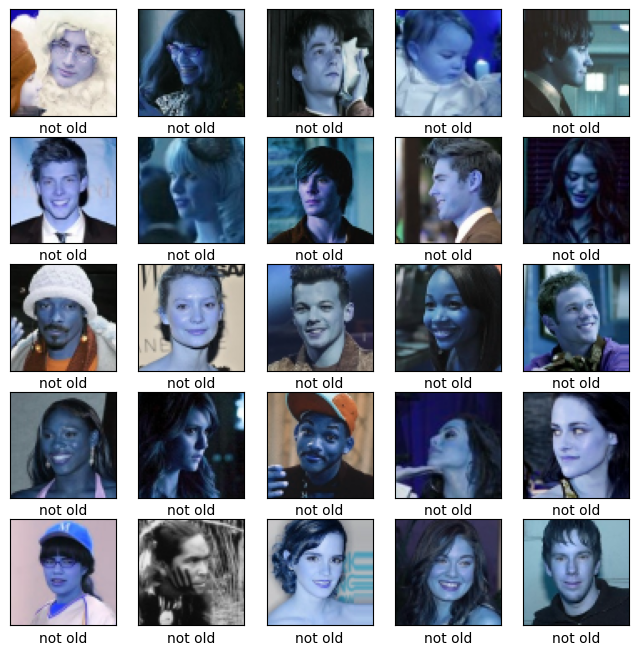

In [3]:
#toon de 1e 25 plaatjes met bijbehorende label (copy paste vorige les)
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)  #vul het i-e image
    plt.xticks([]) #geen schaal bij x-as
    plt.yticks([]) #geen schaal bij y-as
    plt.imshow(train_images[i])
    if train_labels[i]==1:
        plt.xlabel("old")
    else:
        plt.xlabel("not old")
plt.show()

In [4]:
train_images = train_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255

In [ ]:
# model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", kernel_regularizer=regularizers.l2(0.001), input_shape=(128, 128, 3, )),
    layers.MaxPooling2D((3, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation="relu"),
    layers.MaxPooling2D((3, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation="relu"),
    layers.MaxPooling2D((3, 3)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(1, activation="sigmoid")
])

model.summary()

In [ ]:
model.compile(optimizer="ADAM",
             loss="binary_crossentropy",
             metrics=["accuracy"])

In [46]:
history = model.fit(train_images, train_labels,
                    epochs=25,
                    batch_size=32,
                    validation_data=(test_images, test_labels))

Epoch 1/25
1135/1135 ━━━━━━━━━━━━━━━━━━━━ 110s 91ms/step - accuracy: 0.7011 - loss: 0.6108 - val_accuracy: 0.6381 - val_loss: 0.6497
Epoch 2/25
1135/1135 ━━━━━━━━━━━━━━━━━━━━ 88s 78ms/step - accuracy: 0.7204 - loss: 0.5759 - val_accuracy: 0.7207 - val_loss: 0.5749
Epoch 3/25
1135/1135 ━━━━━━━━━━━━━━━━━━━━ 79s 70ms/step - accuracy: 0.7410 - loss: 0.5449 - val_accuracy: 0.7204 - val_loss: 0.5816
Epoch 4/25
1135/1135 ━━━━━━━━━━━━━━━━━━━━ 86s 76ms/step - accuracy: 0.7487 - loss: 0.5309 - val_accuracy: 0.7306 - val_loss: 0.5501
Epoch 5/25
1135/1135 ━━━━━━━━━━━━━━━━━━━━ 95s 84ms/step - accuracy: 0.7626 - loss: 0.5113 - val_accuracy: 0.7513 - val_loss: 0.5229
Epoch 6/25
1135/1135 ━━━━━━━━━━━━━━━━━━━━ 89s 78ms/step - accuracy: 0.7671 - loss: 0.5002 - val_accuracy: 0.7444 - val_loss: 0.5307
Epoch 7/25
1135/1135 ━━━━━━━━━━━━━━━━━━━━ 76s 67ms/step - accuracy: 0.7748 - loss: 0.4898 - val_accuracy: 0.7612 - val_loss: 0.5158
Epoch 8/25
1135/1135 ━━━━━━━━━━━━━━━━━━━━ 87s 77ms/step - accuracy: 0.7883 

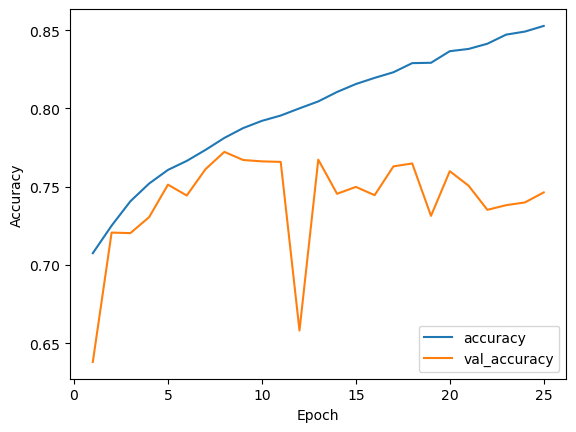

In [47]:
#plot de accuracy en validated accuracy (copy paste vorige keer)
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epochs=range(1, len(acc)+1)
plt.plot(epochs, acc, label='accuracy')
plt.plot(epochs, val_acc, label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

284/284 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step


<Axes: >

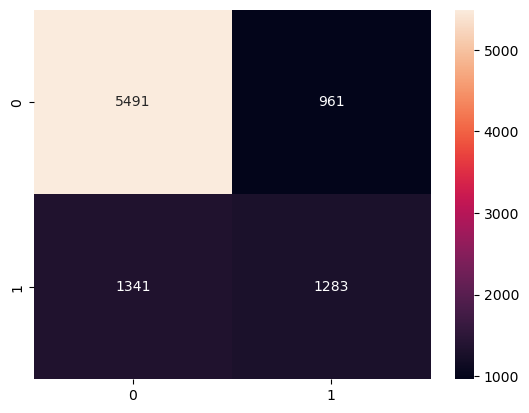

In [77]:
# plot de accuracy en validated accuracy, toon de confusion matrix,
# en toon de een aantal afbeeldingen inclusief of ze volgens het model wel of niet oud zijn,
# doe dit laatste ook voor een paar eigen afbeeldingen
from sklearn.metrics import confusion_matrix

predictions = model.predict([test_images])
list_of_predictions = []

for prediction in range(len(predictions)):
    list_of_predictions.append(np.round(predictions[prediction]))

cm=confusion_matrix(test_labels,list_of_predictions)
sns.heatmap(cm, annot=True, fmt='g')

In [5]:
# model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", kernel_regularizer=regularizers.l1_l2(0.01), input_shape=(64, 64, 3, )),
    layers.MaxPooling2D((3, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation="relu"),
    layers.MaxPooling2D((3, 3)),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(1, activation="sigmoid")
])

model.summary()

C:\Users\raymo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 20, 20, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 20, 20, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 18, 18, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 6, 6, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 174,625 (682.13 KB)

 Trainable params: 174,497 (681.63 KB)

 Non-trainable params: 128 (512.00 B)

In [6]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# train_datagen = ImageDataGenerator(
#     rotation_range=40,
#     shear_range=0.1,
#     horizontal_flip=True,
# )
# data_flow = train_datagen.flow(train_images, tf.reshape(train_labels, (-1)), shuffle=True)

model.compile(optimizer="ADAM",
             loss="binary_crossentropy",
             metrics=["accuracy"])

In [7]:
history = model.fit(train_images, train_labels,
                    epochs=25,
                    batch_size=32,
                    validation_data=(test_images, test_labels))

Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 18ms/step - accuracy: 0.5622 - loss: 0.9572 - val_accuracy: 0.5475 - val_loss: 0.7129
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.6030 - loss: 0.6748 - val_accuracy: 0.6292 - val_loss: 0.6493
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.6299 - loss: 0.6442 - val_accuracy: 0.6383 - val_loss: 0.6391
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.6383 - loss: 0.6360 - val_accuracy: 0.6172 - val_loss: 0.6562
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.6507 - loss: 0.6285 - val_accuracy: 0.6108 - val_loss: 0.6574
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.6523 - loss: 0.6198 - val_accuracy: 0.6090 - val_loss: 0.6600
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.6605 - loss: 0.6135 - val_accuracy: 0.6477 - val_loss: 0.6310
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.6740 -

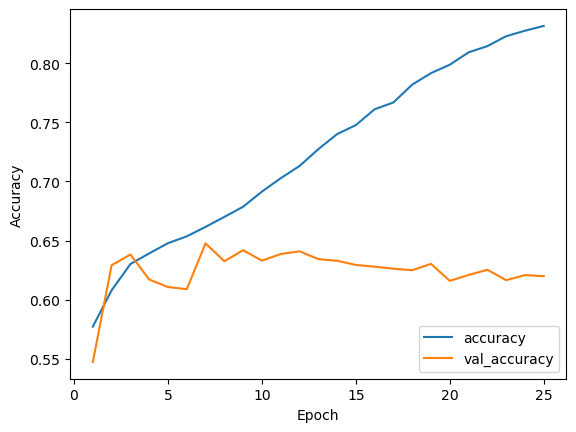

In [8]:
#plot de accuracy en validated accuracy (copy paste vorige keer)
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epochs=range(1, len(acc)+1)
plt.plot(epochs, acc, label='accuracy')
plt.plot(epochs, val_acc, label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


<Axes: >

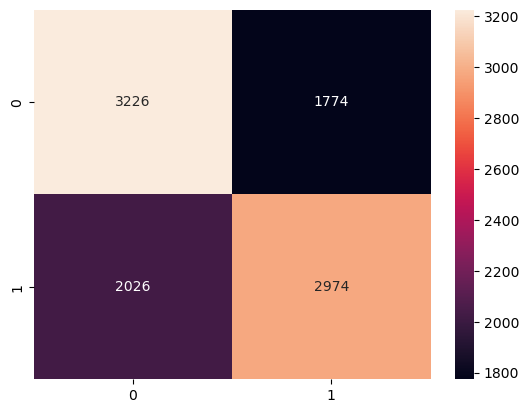

In [9]:
# plot de accuracy en validated accuracy, toon de confusion matrix,
# en toon de een aantal afbeeldingen inclusief of ze volgens het model wel of niet oud zijn,
# doe dit laatste ook voor een paar eigen afbeeldingen
from sklearn.metrics import confusion_matrix

predictions = model.predict([test_images])
list_of_predictions = []

for prediction in range(len(predictions)):
    list_of_predictions.append(np.round(predictions[prediction]))

cm=confusion_matrix(test_labels,list_of_predictions)
sns.heatmap(cm, annot=True, fmt='g')